### Script for reading data for Problem 4.1 (data_AnorocDisease.txt) in Applied Statistics 2023 problem set:

This script reads the file __"data_AnorocDisease.txt"__ for Problem 4.1 in the problem set of Applied Statistics 2023/24. This data files contains 1000 entries in five columns: 

* **Patient ID** of patient (1-1000),
* **Temperature** of patient (in Celcius),
* **Blood Pressure** of patient,
* **Age** of patient,
* **Status** of patient (0: Healthy, 1: Ill, -1: Unknown).


####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 14th of October 2023 (latest version)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
dataframe = pd.read_csv('data_AnorocDisease.csv', header=0)
PatientID, Temp, BloodP, Age, Status = dataframe.values.T
dataframe

,PatientID,Temp,BloodP,Age,Status (0: Healthy; 1: Ill; -1: Unknown)
0,1.0,36.3,125.7,56.8,0.0
1,2.0,37.6,121.4,67.7,1.0
2,3.0,38.7,117.6,67.3,1.0
3,4.0,35.8,116.3,60.0,0.0
4,5.0,37.6,142.9,81.9,0.0
...,...,...,...,...,...
995,996.0,37.1,127.6,74.2,-1.0
996,997.0,36.9,123.7,47.1,-1.0
997,998.0,37.3,113.4,39.2,-1.0
998,999.0,37.0,129.3,68.3,-1.0


Print the first 10 entries to check the content of the file:

In [3]:
for i in range(10):
    print(f"  Patient {int(PatientID[i]):4d}:  Temp = {Temp[i]:4.1f} C    Blood Pres = {BloodP[i]:5.1f}   Age = {Age[i]:5.1f}   Status: {int(Status[i]):2d}")

  Patient    1:  Temp = 36.3 C    Blood Pres = 125.7   Age =  56.8   Status:  0
  Patient    2:  Temp = 37.6 C    Blood Pres = 121.4   Age =  67.7   Status:  1
  Patient    3:  Temp = 38.7 C    Blood Pres = 117.6   Age =  67.3   Status:  1
  Patient    4:  Temp = 35.8 C    Blood Pres = 116.3   Age =  60.0   Status:  0
  Patient    5:  Temp = 37.6 C    Blood Pres = 142.9   Age =  81.9   Status:  0
  Patient    6:  Temp = 37.7 C    Blood Pres = 126.8   Age =  63.9   Status:  0
  Patient    7:  Temp = 36.7 C    Blood Pres = 114.2   Age =  55.0   Status:  0
  Patient    8:  Temp = 35.2 C    Blood Pres = 126.5   Age =  55.5   Status:  0
  Patient    9:  Temp = 39.2 C    Blood Pres = 138.1   Age =  34.3   Status:  1
  Patient   10:  Temp = 36.1 C    Blood Pres = 125.8   Age =  62.5   Status:  0


### 4.1 (15 points) Patients are either healthy or infected with Anoroc disease and their temperature, blood pressure and age is found in www.nbi.dk/petersen/data AnorocDisease.csv. For patients 1-800 (control) the outcome in known, while it is unknown for patients 801-1000 (unknown).

 Using the control sample, plot the three distributions for healthy and sick, respectively. Which of the three single measures gives the highest separation between healthy and sick?

In [4]:
healthy_mask = Status == 0
sick_mask = Status == 1
dist_list = [Temp, BloodP, Age]
labels_list = ['Temperature / C', 'Blood Pressure', 'Age']

In [5]:
def plot_control(ax, xmin, xmax, Nbins, data, xlabel):
    # binwidth = (xmax - xmin) / Nbins
    ax.hist(data[healthy_mask], bins=Nbins, range=(xmin, xmax), histtype='step', label='Healthy')
    ax.hist(data[sick_mask], bins=Nbins, range=(xmin, xmax), histtype='step', label='Ill')
    ax.set(xlabel=xlabel, ylabel="Count", xlim=(xmin-1.0, xmax+1.0))
    ax.legend(frameon = False)

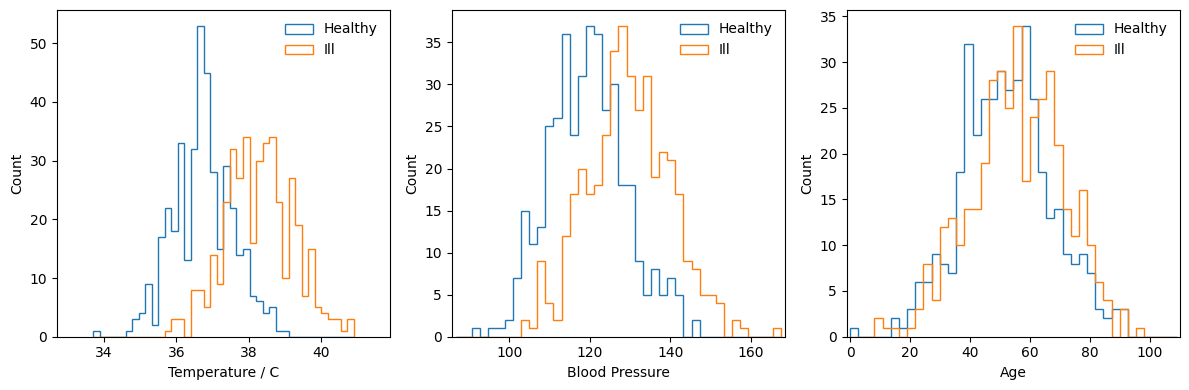

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

for i, dist in enumerate(dist_list):
    plot_control(ax[i], min(dist), max(dist), 40, dist, labels_list[i])

plt.tight_layout()
fig.savefig('Distributions_prop4.png', dpi = 600)

Test if the age distribution is statistically the same between healthy and sick.

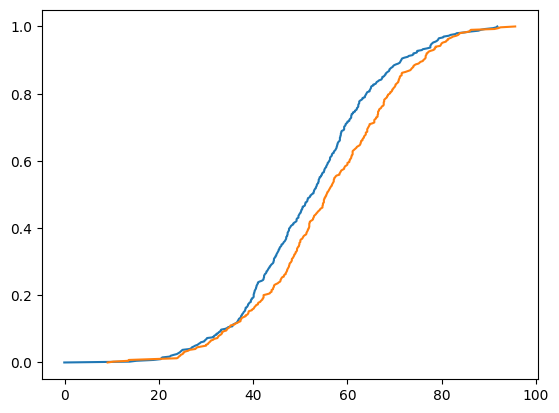

In [8]:
plt.plot(np.sort(Age[healthy_mask]), np.linspace(0,1,np.sum(healthy_mask)))
plt.plot(np.sort(Age[sick_mask]), np.linspace(0,1,np.sum(sick_mask)))

In [9]:
stats.ks_2samp(Age[healthy_mask], Age[sick_mask])

KstestResult(statistic=0.1325, pvalue=0.0017621899205092087)

Given any combination of all three variables, separate the two groups as well as possible and estimate the number of infected patients in the unknown group.

In [15]:
frac_list = []

for temp in np.linspace(33, 45, 100):
    count_healthy = 0
    for T in Temp[healthy_mask]:
        if T < temp:
            count_healthy += 1

    count_sick = 0
    for T in Temp[sick_mask]:
        if T > temp:
            count_sick += 1

    frac = (count_healthy + count_sick) / 800
    frac_list.append(frac)

print(max(frac_list))
print(np.linspace(33, 45, 100)[np.argmax(frac_list)])

0.81375
37.484848484848484


In [16]:
split_temp = np.linspace(33, 45, 100)[np.argmax(frac_list)]
unknown_mask = Status == -1
count = 0
for T in Temp[unknown_mask]:
    if T > split_temp:
        count += 1

print(count)

69


Assuming a prior probability of p = 0.01 of being ill, what is the probability that a new patient with T = 38.5 C is ill?

In [18]:
count_healthy = 0
for T in Temp[healthy_mask]:
    if T == 38.5:
        count_healthy += 1

frac_healthy = count_healthy / 800

count_sick = 0
for T in Temp[sick_mask]:
    if T == 38.5:
        count_sick += 1

frac_sick = count_sick / 800

print(frac_healthy)
print(frac_sick)

0.00125
0.0175


In [19]:
p_ill = 0.01
p_healthy = 0.99 # p_ill + p_healthy = 1

p_ill_385 = (frac_sick * p_ill) / (frac_sick * p_ill + frac_healthy * p_healthy) # Bayes
print(p_ill_385)

0.12389380530973453
